# 0. Imports 

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import numpy as np

from datetime import datetime

# 1. Loading Data 

In [212]:
df_client_train = pd.read_csv('dataset/client_train.csv', low_memory=False)
df_client_test = pd.read_csv('dataset/client_test.csv', low_memory=False)
df_invoice_train = pd.read_csv('dataset/invoice_train.csv', low_memory=False)
df_invoice_test = pd.read_csv('dataset/invoice_test.csv', low_memory=False)

# 2. Data Description


## 2.1 Data Dimensions 

In [247]:
print(f'df_client_train (lines = {df_client_train.shape[0]}, cols = {df_client_train.shape[1]})')

df_client_train (lines = 20001, cols = 6)


In [214]:
print(f'df_client_test (lines = {df_client_test.shape[0]}, cols = {df_client_test.shape[1]})')

df_client_test (lines = 58069, cols = 5)


In [215]:
print(f'df_invoice_train (lines = {df_invoice_train.shape[0]}, cols = {df_invoice_train.shape[1]})')

df_invoice_train (lines = 4476749, cols = 16)


In [216]:
print(f'df_invoice_test (lines = {df_invoice_test.shape[0]}, cols = {df_invoice_test.shape[1]})')

df_invoice_test (lines = 1939730, cols = 16)


In [217]:
df_client_train = df_client_train.loc[0:20000, :]
df_client_test = df_client_test.loc[0:5000, :]
df_invoice_train = df_invoice_train.loc[0:100000, :]
df_invoice_test = df_invoice_test.loc[0:30000, :]

## 2.2 Data Types 

In [218]:
print('df_client_train')
print('---------------')
df_client_train.dtypes

df_client_train
---------------


disrict            int64
client_id         object
client_catg        int64
region             int64
creation_date     object
target           float64
dtype: object

In [219]:
print('df_client_test')
print('---------------')
df_client_test.dtypes

df_client_test
---------------


disrict           int64
client_id        object
client_catg       int64
region            int64
creation_date    object
dtype: object

In [220]:
print('df_invoice_train')
print('---------------')
df_invoice_train.dtypes

df_invoice_train
---------------


client_id               object
invoice_date            object
tarif_type               int64
counter_number           int64
counter_statue          object
counter_code             int64
reading_remarque         int64
counter_coefficient      int64
consommation_level_1     int64
consommation_level_2     int64
consommation_level_3     int64
consommation_level_4     int64
old_index                int64
new_index                int64
months_number            int64
counter_type            object
dtype: object

In [221]:
print('df_invoice_test')
print('---------------')
df_invoice_test.dtypes

df_invoice_test
---------------


client_id               object
invoice_date            object
tarif_type               int64
counter_number           int64
counter_statue           int64
counter_code             int64
reading_remarque         int64
counter_coefficient      int64
consommation_level_1     int64
consommation_level_2     int64
consommation_level_3     int64
consommation_level_4     int64
old_index                int64
new_index                int64
months_number            int64
counter_type            object
dtype: object

## 2.3 Checkin NA 

In [222]:
df_client_train.isna().sum()

disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
target           0
dtype: int64

In [223]:
df_client_test.isna().sum()

disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
dtype: int64

In [224]:
df_invoice_train.isna().sum()

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

In [225]:
df_invoice_test.isna().sum()

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

## 2.4 Changing Types 

In [227]:
# From object to datetime
df_client_train.creation_date = pd.to_datetime(df_client_train.creation_date, infer_datetime_format=True)
df_client_test.creation_date = pd.to_datetime(df_client_test.creation_date, infer_datetime_format=True)

In [228]:
df_client_train.dtypes

disrict                   int64
client_id                object
client_catg               int64
region                    int64
creation_date    datetime64[ns]
target                  float64
dtype: object

In [231]:
# From object to datetime
df_invoice_train.invoice_date = pd.to_datetime(df_invoice_train.invoice_date, infer_datetime_format=True)
df_invoice_test.invoice_date = pd.to_datetime(df_invoice_test.invoice_date, infer_datetime_format=True)

In [232]:
df_invoice_train.dtypes

client_id                       object
invoice_date            datetime64[ns]
tarif_type                       int64
counter_number                   int64
counter_statue                  object
counter_code                     int64
reading_remarque                 int64
counter_coefficient              int64
consommation_level_1             int64
consommation_level_2             int64
consommation_level_3             int64
consommation_level_4             int64
old_index                        int64
new_index                        int64
months_number                    int64
counter_type                    object
dtype: object

## 2.5 Basic Descriptive Statistics 

### 2.5.1 Clients 

In [233]:
df_client_train.columns.tolist()

['disrict', 'client_id', 'client_catg', 'region', 'creation_date', 'target']

In [234]:
df_client_train.value_counts(subset='target', normalize=True)

target
0.0    0.943103
1.0    0.056897
dtype: float64

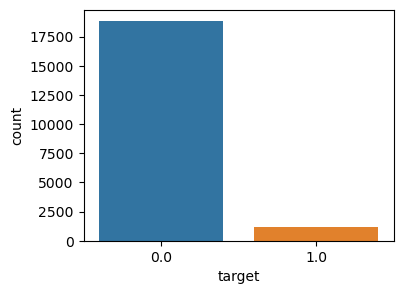

In [235]:
plt.figure(figsize=(4,3))
sns.countplot(data=df_client_train, x='target');

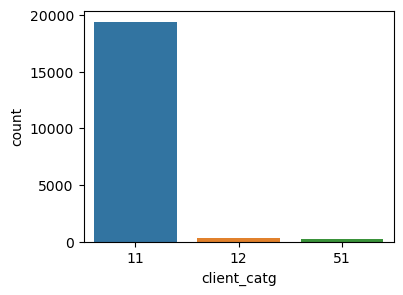

In [236]:
plt.figure(figsize=(4,3))
sns.countplot(data=df_client_train, x='client_catg');

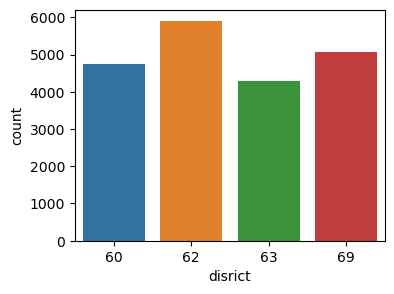

In [237]:
plt.figure(figsize=(4,3))
sns.countplot(data=df_client_train, x='disrict');

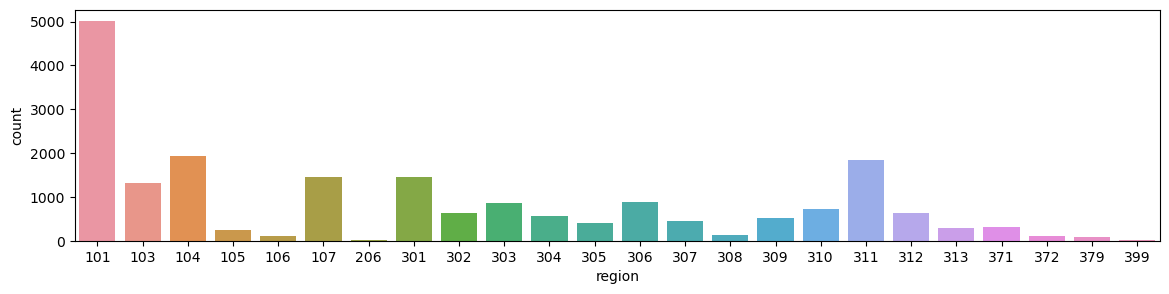

In [238]:
plt.figure(figsize=(14,3))
sns.countplot(data=df_client_train, x='region');

In [239]:
df_client_train.describe()

,disrict,client_catg,region,target
count,20001.000000,20001.000000,20001.000000,20001.000000
mean,63.517174,11.497275,205.620319,0.056897
std,3.360821,4.355457,104.228445,0.231652
min,60.000000,11.000000,101.000000,0.000000
25%,62.000000,11.000000,101.000000,0.000000
50%,62.000000,11.000000,107.000000,0.000000
75%,69.000000,11.000000,307.000000,0.000000
max,69.000000,51.000000,399.000000,1.000000


### 2.5.2 Invoice 

In [240]:
df_invoice_train.columns.tolist()

['client_id',
 'invoice_date',
 'tarif_type',
 'counter_number',
 'counter_statue',
 'counter_code',
 'reading_remarque',
 'counter_coefficient',
 'consommation_level_1',
 'consommation_level_2',
 'consommation_level_3',
 'consommation_level_4',
 'old_index',
 'new_index',
 'months_number',
 'counter_type']

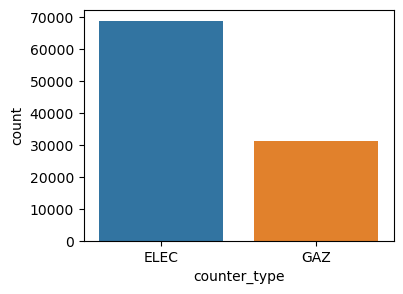

In [241]:
plt.figure(figsize=(4,3));
sns.countplot(data=df_invoice_train, x='counter_type');

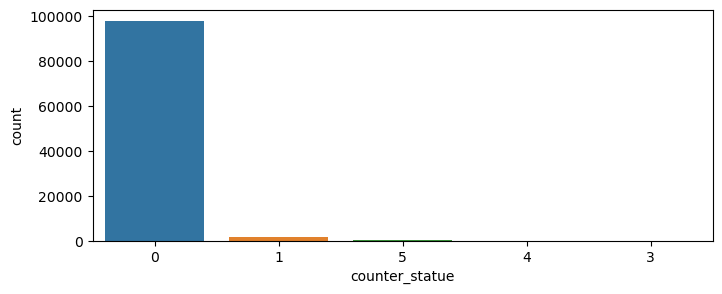

In [242]:
plt.figure(figsize=(8,3));
sns.countplot(data=df_invoice_train, x='counter_statue');

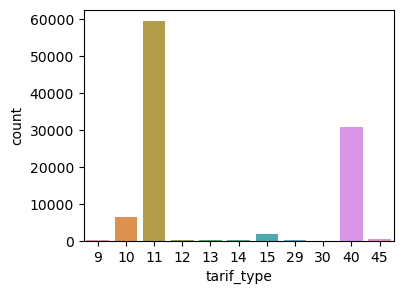

In [243]:
plt.figure(figsize=(4,3));
sns.countplot(data=df_invoice_train, x='tarif_type');

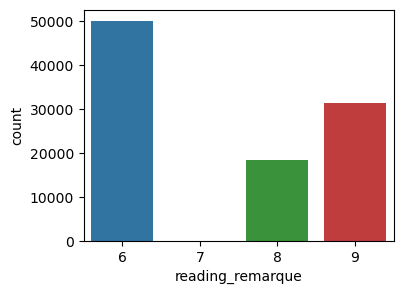

In [244]:
plt.figure(figsize=(4,3));
sns.countplot(data=df_invoice_train, x='reading_remarque');

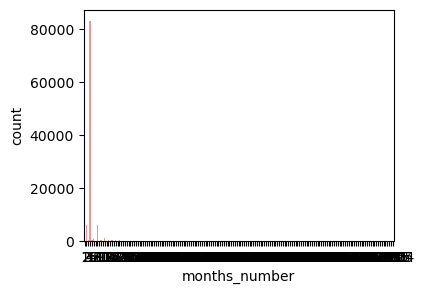

In [245]:
plt.figure(figsize=(4,3));
sns.countplot(data=df_invoice_train, x='months_number');

In [246]:
df_invoice_train.describe()

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,100001.000000,1.000010e+05,100001.000000,100001.000000,100001.0,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000
mean,20.092109,9.797026e+10,171.883421,7.311727,1.0,406.375296,94.554804,22.190148,44.412576,16931.870411,17517.110229,61.304577
std,13.450331,1.440724e+12,132.721463,1.358718,0.0,662.485643,658.729097,352.089642,638.812985,38414.956627,38860.940923,1688.741482
min,9.000000,0.000000e+00,5.000000,6.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,11.000000,1.244480e+05,5.000000,6.000000,1.0,75.000000,0.000000,0.000000,0.000000,1706.000000,1997.000000,4.000000
50%,11.000000,5.109530e+05,203.000000,6.000000,1.0,263.000000,0.000000,0.000000,0.000000,7309.000000,7839.000000,4.000000
75%,40.000000,1.145727e+06,207.000000,9.000000,1.0,600.000000,0.000000,0.000000,0.000000,20777.000000,21536.000000,4.000000
max,45.000000,2.738110e+13,506.000000,9.000000,1.0,93385.000000,99398.000000,45360.000000,87776.000000,867253.000000,877022.000000,99104.000000


## 2.6 Main Conclusions

- A maioria dos dados é referente ao consumo de energia elétrica
- A frequencia com que os clientes é cobrado pode ser variável

# 3. Filtering Variables

In [300]:
df3_clients = df_client_train.copy()
df3_invoice = df_invoice_train.copy()

Filtrando apenas consumidores de energia elétrica

In [301]:
df3_invoice = df3_invoice[df3_invoice['counter_type'] == 'ELEC']

In [302]:
df3_clients.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,1994-12-31,0.0
1,69,train_Client_1,11,107,2002-05-29,0.0
2,62,train_Client_10,11,301,1986-03-13,0.0
3,69,train_Client_100,11,105,1996-11-07,0.0
4,62,train_Client_1000,11,303,2014-10-14,0.0


# 4. Feature Engineering

In [303]:
df4_invoice = df3_invoice.copy()
df4_clients = df3_clients.copy()

## 4.1 Period between invoices 

Notei que o atributo 'months_number', que deveria apresentar a quantidade de meses que foi faturada apresentava algumas inconsistênia. Portanto, resolvi checar isso manualmente, calculando a quantidade de meses entre duas cobranças.

In [304]:
df4_invoice = df4_invoice.sort_values(by='invoice_date')
df4_invoice.loc[0,'last_invoice_date'] = np.nan
clients = df4_invoice.client_id.unique()
for client in clients:
    cont = 0
    for index, row in df4_invoice[df4_invoice.client_id == client].iterrows():
        if cont == 0:
            initial_date = row['invoice_date']
        else:
            df4_invoice.loc[index, 'last_invoice_date'] = initial_date.date()
            initial_date = df4_invoice.loc[index, 'invoice_date']
        cont=+1

In [305]:
df4_invoice = df4_invoice.dropna()

In [292]:
def check_period(row):
    "Esta funcao calcula a quantidade de meses entre duas datas"
    initial = row['last_invoice_date'] # datetime.strptime(row['last_invoice_date'], "%Y-%m-%d").date()
    final = row['invoice_date'] # datetime.strptime(row['invoice_date'], "%Y-%m-%d").date()
    
    return (final.year - initial.year) * 12 + final.month - initial.month

In [306]:
df4_invoice['months_between'] = df4_invoice.apply(check_period, axis = 1)

Um outro fator que foi verificado, foi o intervalo entre cobranças não padronizado entre todos os clientes e nem mesmo para um único cliente. Na figura abaixo notamos que o valor mais comum para o intervalo entre cobranças é o de 4 meses.

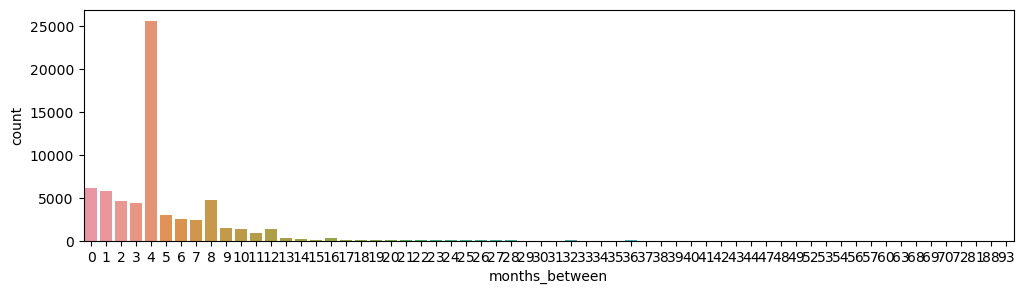

In [307]:
plt.figure(figsize=(12,3))
sns.countplot(data=df4_invoice, x='months_between');

## 4.2 Clients new features 

Como a ideia é encontrar fraudes, busquei construir algums features que representam o padrão de consumo de cada consumidor.

In [333]:
df4_invoice.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,last_invoice_date,months_between
51618,train_Client_101393,1979-08-28,10,7952365,0,102,6,1,28,0,0,0,2,30,4,ELEC,1979-04-25,4
51617,train_Client_101393,1979-10-25,10,7952365,0,102,6,1,44,0,0,0,30,74,2,ELEC,1979-08-28,2
51616,train_Client_101393,1979-12-26,10,7952365,0,102,6,1,66,0,0,0,74,140,2,ELEC,1979-10-25,2
51615,train_Client_101393,1980-02-26,10,7952365,0,102,6,1,84,0,0,0,140,224,2,ELEC,1979-12-26,2
61613,train_Client_101648,1980-12-11,10,8630278,0,202,6,1,196,0,0,0,1030,1226,2,ELEC,1980-10-09,2


In [329]:
df4_avg = df4_invoice.groupby(by='client_id').mean()[['consommation_level_1', 'consommation_level_2', 'consommation_level_3', 'months_between']]
df4_avg.columns = ['avg_con1', 'avg_con2', 'avg_con3', 'avg_month_invoice']

df4_std = df4_invoice.groupby(by='client_id').std()[['consommation_level_1', 'consommation_level_2', 'consommation_level_3', 'months_between']]
df4_std.columns = ['std_con1', 'std_con2', 'std_con3', 'std_month_invoice']

df4_min = df4_invoice.groupby(by='client_id').min()[['consommation_level_1', 'consommation_level_2', 'consommation_level_3', 'months_between']]
df4_min.columns = ['min_con1', 'min_con2', 'min_con3', 'min_month_invoice']

df4_max = df4_invoice.groupby(by='client_id').max()[['consommation_level_1', 'consommation_level_2', 'consommation_level_3', 'months_between']]
df4_max.columns = ['max_con1', 'max_con2', 'max_con3', 'max_month_invoice']

df4_q1 = df4_invoice.groupby(by='client_id')[['consommation_level_1', 'consommation_level_2', 'consommation_level_3', 'months_between']].quantile(q=0.25)
df4_q1.columns = ['q1_con1', 'q1_con2', 'q1_con3', 'q1_month_invoice']

df4_q3 = df4_invoice.groupby(by='client_id')[['consommation_level_1', 'consommation_level_2', 'consommation_level_3', 'months_between']].quantile(q=0.75)
df4_q3.columns = ['q3_con1', 'q3_con2', 'q3_con3', 'q3_month_invoice']

In [331]:
df_features = pd.concat([df4_avg, df4_std, df4_min, df4_max, df4_q1, df4_q3], axis = 1)

In [336]:
df_features.columns

Index(['avg_con1', 'avg_con2', 'avg_con3', 'avg_month_invoice', 'std_con1',
       'std_con2', 'std_con3', 'std_month_invoice', 'min_con1', 'min_con2',
       'min_con3', 'min_month_invoice', 'max_con1', 'max_con2', 'max_con3',
       'max_month_invoice', 'q1_con1', 'q1_con2', 'q1_con3',
       'q1_month_invoice', 'q3_con1', 'q3_con2', 'q3_con3',
       'q3_month_invoice'],
      dtype='object')

# 5. Statistical Analysis 

## 5.1 Univariate Statistics

## 5.2 Bivariate Statistics

## 5.3 Time Series Statistics 

# 6. Data Preparation 

# 7. Feature Selection 

# 8. Machine Learning Modeling 

# 9. Fine Tuning 

# 10. Cross-validation 